In [3]:
using QuantumDynamics
using Plots
using LinearAlgebra

Hoping to get rid of the units issue by integrating Unitful into QuantumDynamics package.

In [20]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254
const mev2invcm = 8.066
const mev2au = mev2invcm * invcm2au
const nm2au = 18.897

18.897

In [26]:
N = 5

5

In [61]:
    H0 = Matrix{ComplexF64}([
        4.018 0.058 -0.086 0.168 0.000
        0.058 4.017 -0.168 0.086 0.000
        -0.086 -0.168 5.043 0.000 0.000
        0.168 0.086 0.000 5.042 0.000
        0.000 0.000 0.000 0.000 4.006 
    ]) * 1000 * mev2au

5×5 Matrix{ComplexF64}:
    0.147667+0.0im   0.00213158+0.0im  …  0.00617423+0.0im       0.0+0.0im
  0.00213158+0.0im      0.14763+0.0im     0.00316062+0.0im       0.0+0.0im
 -0.00316062+0.0im  -0.00617423+0.0im            0.0+0.0im       0.0+0.0im
  0.00617423+0.0im   0.00316062+0.0im         0.1853+0.0im       0.0+0.0im
         0.0+0.0im          0.0+0.0im            0.0+0.0im  0.147226+0.0im

In [71]:
nsteps = 600
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[1, 1] = 1.0

T = 50.0:50.0:500.0

β = 1 / (T[6] * 3.16683e-6) # T = 300K

1052.5772881188234

Simulation is very sensitive to time-stepping. NaNs get produced if you're not careful

In [72]:
dt = 5/au2fs 

206.70687287875495

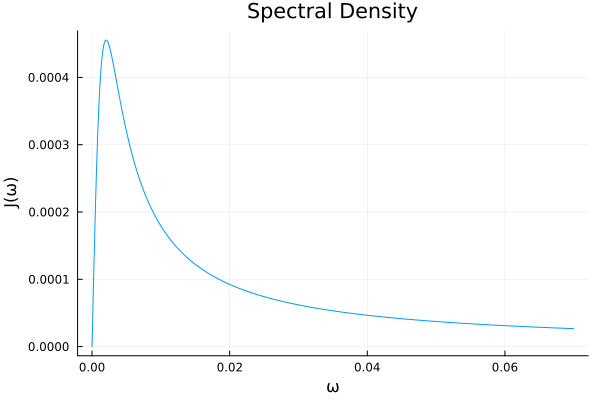

In [73]:
Jw2 = SpectralDensities.DrudeLorentz(λ=100*invcm2au, γ=450*invcm2au, Δs=1.0)
ω = 0:0.0001:0.07
ωs2, cs2 = SpectralDensities.discretize(Jw2, 100)
plot(ω, Jw2.(ω), xlabel="ω", ylabel="J(ω)", title="Spectral Density", legend=false)

In [74]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt, ntimes=nsteps)
tquapi, ρquapi = QuAPI.propagate(; 
                                fbU=fbU, 
                                Jw=[Jw2],
                                β=β,
                                ρ0=ρ0,
                                dt,
                                ntimes=nsteps,
                                svec=[1.0 2.0 3.0 4.0 5.0],
                                kmax=3,
                                verbose=true)

[ Info: Starting propagation within memory
[ Info: Step = 1, #paths = 1
[ Info: Step = 2, #paths = 16
[ Info: Step = 3, #paths = 256
[ Info: Starting iteration
[ Info: Step = 4, #paths = 4096
[ Info: Step = 5, #paths = 65536
[ Info: Step = 6, #paths = 65536
[ Info: Step = 7, #paths = 65536
[ Info: Step = 8, #paths = 65536
[ Info: Step = 9, #paths = 65536
[ Info: Step = 10, #paths = 65536
[ Info: Step = 11, #paths = 65536
[ Info: Step = 12, #paths = 65536
[ Info: Step = 13, #paths = 65536
[ Info: Step = 14, #paths = 65536
[ Info: Step = 15, #paths = 65536
[ Info: Step = 16, #paths = 65536
[ Info: Step = 17, #paths = 65536
[ Info: Step = 18, #paths = 65536
[ Info: Step = 19, #paths = 65536
[ Info: Step = 20, #paths = 65536
[ Info: Step = 21, #paths = 65536
[ Info: Step = 22, #paths = 65536
[ Info: Step = 23, #paths = 65536
[ Info: Step = 24, #paths = 65536
[ Info: Step = 25, #paths = 65536
[ Info: Step = 26, #paths = 65536
[ Info: Step = 27, #paths = 65536
[ Info: Step = 28, #paths = 655

(0.0:206.70687287875495:124024.12372725297, [1.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.8568160539950306 + 0.0im -0.0573983582336377 - 0.2129852747801658im … -0.21542644363126146 + 0.025857942497687678im 0.0 + 0.0im; … ; 0.40490069430476144 - 2.2324724801394152e-17im -0.19705424983247422 + 0.0015312519226874134im … -0.032309586329861376 + 0.004282705983411464im 0.0 + 0.0im; 0.4048833752164767 + 9.956249591094341e-17im -0.19704361489566563 + 0.0015310527073168836im … -0.032306638549740516 + 0.004282828620645853im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -0.0573983582336377 + 0.2129852747801658im 0.05787866398527071 + 0.0im … 0.008473623852617424 - 0.05852768240910393im 0.0 + 0.0im; … ; -0.19705424983247494 - 0.0015312519226879317im 0.3581853447459122 - 3.2899896776333175e-17im … 0.0021792992728020327 - 1.2001601126562789e-5im 0.0 + 0.0im; -0.1970436148956654 - 0.0015310527073167106im 0.358170480429077 - 1.0920410022905805e-16im … 0.002178308694987795 -

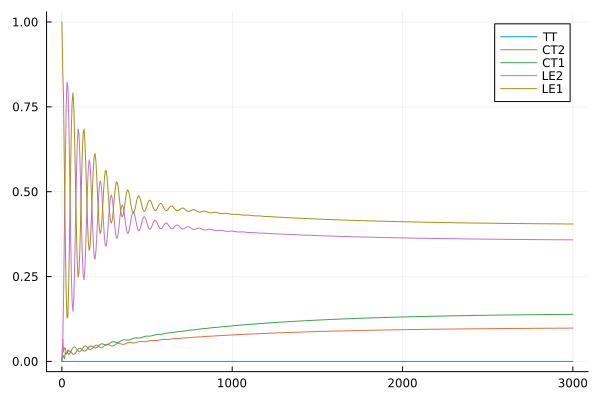

In [75]:
plot(tquapi.*au2fs, real.(ρquapi[:, 5, 5]), label="TT")
plot!(tquapi.*au2fs, real.(ρquapi[:, 4, 4]), label="CT2")
plot!(tquapi.*au2fs, real.(ρquapi[:, 3, 3]), label="CT1")
plot!(tquapi.*au2fs, real.(ρquapi[:, 2, 2]), label="LE2")
plot!(tquapi.*au2fs, real.(ρquapi[:, 1, 1]), label="LE1")

In [76]:
λs = repeat([100.0], 5) * mev2au
γs = repeat([450.0], 5) * mev2au
JwH = Vector{SpectralDensities.DrudeLorentz}()
sys_ops = Vector{Matrix{ComplexF64}}()
for (j, (λ, γ)) in enumerate(zip(λs, γs))
    push!(JwH, SpectralDensities.DrudeLorentz(; λ, γ, Δs=1.0))
    op = zeros(5, 5)
    op[j, j] = 1.0
    push!(sys_ops, op)
end


times_HEOM, ρs_HEOM = HEOM.propagate(;
                                    Hamiltonian=H0,
                                    ρ0,
                                    β,
                                    dt,
                                    ntimes=nsteps,
                                    Jw=JwH,
                                    sys_ops=sys_ops,
                                    num_modes=1,
                                    Lmax=2)

([0.0, 206.70687287875495, 413.4137457575099, 620.1206186362649, 826.8274915150198, 1033.5343643937747, 1240.2412372725296, 1446.9481101512847, 1653.6549830300396, 1860.3618559087945  …  122163.76187134418, 122370.46874422293, 122577.17561710169, 122783.88248998045, 122990.5893628592, 123197.29623573796, 123404.0031086167, 123610.70998149546, 123817.41685437421, 124024.12372725297], [1.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.8504489958799906 + 0.0im -0.04420608188325162 - 0.12476512646315567im … -0.12380231309658028 - 0.05825434837211404im 0.0 + 0.0im; … ; 0.3483455218162156 + 0.0im -0.07657794620180501 - 0.0002462048572163962im … -0.017629241845077383 - 7.050026456770248e-5im 0.0 + 0.0im; 0.3483455218268079 + 0.0im -0.07657794620186056 - 0.00024620487113120296im … -0.017629241856920667 - 7.05003215393443e-5im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -0.04420608188325162 + 0.12476512646315567im 0.04338293343275055 + 0.0im … 0.023323009601606683 - 0.0

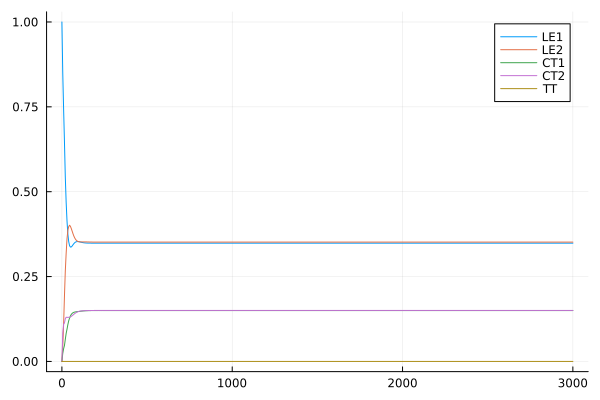

In [77]:
plot(times_HEOM.*au2fs, real.(ρs_HEOM[:, 1, 1]), label="LE1")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 2, 2]), label="LE2")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 3, 3]), label="CT1")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 4, 4]), label="CT2")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 5, 5]), label="TT")

In [78]:
times_BRME, ρs_BRME = BlochRedfield.propagate(;
                                            Hamiltonian=H0,
                                            Jw=JwH,
                                            β,
                                            ρ0,
                                            dt,
                                            ntimes=nsteps,
                                            sys_ops)

([0.0, 206.70687287875495, 413.4137457575099, 620.1206186362649, 826.8274915150198, 1033.5343643937747, 1240.2412372725296, 1446.9481101512847, 1653.6549830300396, 1860.3618559087945  …  122163.76187134418, 122370.46874422293, 122577.17561710169, 122783.88248998045, 122990.5893628592, 123197.29623573796, 123404.0031086167, 123610.70998149546, 123817.41685437421, 124024.12372725297], [1.0000000000000002 + 0.0im -5.721291458939605e-17 + 0.0im … 9.88544890789825e-18 + 0.0im -0.0 + 0.0im; 0.8475036466874609 + 3.763929108367819e-16im -0.0335816899614385 - 0.21286125326879218im … -0.20335759801002848 - 0.09478694916687457im 0.01020481968934761 - 0.0016113919654149778im; … ; 0.4250842429209037 - 5.3649589850071095e-18im -0.3542289446497229 - 1.3517016179930777e-5im … -0.034648862917425034 + 9.520217603458968e-7im 4.7791749483705536e-5 + 1.6520716826288365e-5im; 0.42508416732940124 - 5.5368267924984924e-18im -0.35423205271756136 - 1.3355943583257026e-5im … -0.034648575388109254 + 9.38376344372

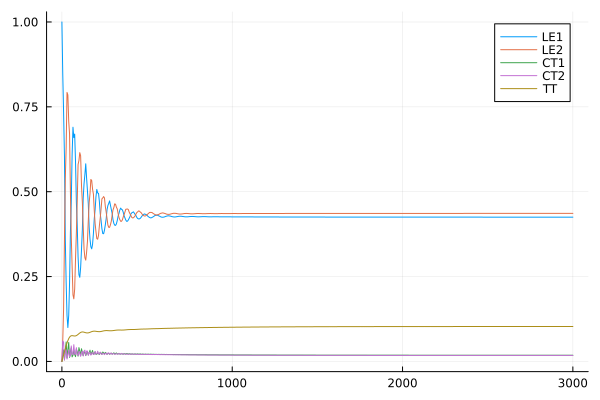

In [79]:
plot(times_BRME.*au2fs, real.(ρs_BRME[:, 1, 1]), label="LE1")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 2, 2]), label="LE2")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 3, 3]), label="CT1")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 4, 4]), label="CT2")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 5, 5]), label="TT")